In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from my_functions import *
from sklearn.tree import DecisionTreeClassifier

In [437]:
df_prep = pd.read_csv("..//datasets/gasometry_prepared_data.csv")
cols=["BETET",	"CO2TET",	"HCO3ACTE",	"HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]
my_blue="#0064B2";
my_red="#D61600";

In [438]:
cols2=["BETET",	"CO2TET",	"O2TET", "IONH"]

In [603]:
df_miernik=df_prep[cols2]
stymulanty=["BETET", "O2TET"]
destymulanty=["IONH", "CO2TET"]
df_miernik[["BETET_neg", "O2TET_neg"]]=df_miernik[stymulanty].applymap(lambda x: 0 if x >= 0 else abs(x))
df_miernik[["IONH_neg", "CO2TET_neg"]]=df_miernik[destymulanty].applymap(lambda x: 0 if x <= 1 else x-1)
df_miernik[["BETET_all", "O2TET_all"]] = df_miernik[stymulanty].applymap(lambda x: 0 if (x >= 0) and (x <= 1) else (abs(x) if x < 0 else x - 1))
df_miernik[["IONH_all", "CO2TET_all"]] = df_miernik[destymulanty].applymap(lambda x: 0 if (x >= 0) and (x <= 1) else (abs(x) if x < 0 else x - 1))
# df_miernik["IONH"]=df_miernik["IONH"].apply(lambda x: 0 if x < 1 else x-1)
df_miernik

col_neg=["BETET_neg", "O2TET_neg", "CO2TET_neg", "IONH_neg"]
col_all=["BETET_all", "O2TET_all", "IONH_all", "CO2TET_all"]

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\4111092813.py:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\4111092813.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\4111092813.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\4111092813.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFram

In [604]:
df_miernik_df=pd.concat([df_miernik, df_prep[["PACJENT_NR", "BADANIE_NR", "ZGON"]]], axis=1)         
df_miernik_df['Miernik neg_sum'] = df_miernik[col_neg].sum(axis=1)
df_miernik_df["Miernik neg_sum skum."]=df_miernik_df.groupby('PACJENT_NR')['Miernik neg_sum'].cumsum()

df_miernik_df['Miernik all_sum'] = df_miernik[col_all].sum(axis=1)
df_miernik_df["Miernik all_sum skum."]=df_miernik_df.groupby('PACJENT_NR')['Miernik all_sum'].cumsum()
df_miernik_df.to_excel("miernik_skum.xlsx")

In [605]:
df_miernik_df

,BETET,CO2TET,O2TET,IONH,BETET_neg,O2TET_neg,IONH_neg,CO2TET_neg,BETET_all,O2TET_all,IONH_all,CO2TET_all,PACJENT_NR,BADANIE_NR,ZGON,Miernik neg_sum,Miernik neg_sum skum.,Miernik all_sum,Miernik all_sum skum.
0,0.326087,2.21,-0.720,1.882698,0.000000,0.72,0.882698,1.21,0.000000,0.72,0.882698,1.21,1.0,1.0,0.0,2.812698,2.812698,2.812698,2.812698
1,0.086957,5.22,4.880,1.425028,0.000000,0.00,0.425028,4.22,0.000000,3.88,0.425028,4.22,1.0,2.0,0.0,4.645028,7.457726,8.525028,11.337726
2,0.760870,3.10,6.000,2.201643,0.000000,0.00,1.201643,2.10,0.000000,5.00,1.201643,2.10,1.0,3.0,0.0,3.301643,10.759368,8.301643,19.639368
3,0.869565,2.75,1.440,1.882698,0.000000,0.00,0.882698,1.75,0.000000,0.44,0.882698,1.75,1.0,4.0,0.0,2.632698,13.392066,3.072698,22.712066
4,0.608696,2.61,2.800,1.970160,0.000000,0.00,0.970160,1.61,0.000000,1.80,0.970160,1.61,1.0,5.0,0.0,2.580160,15.972226,4.380160,27.092226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,-0.717391,1.63,0.420,2.294287,0.717391,0.00,1.294287,0.63,0.717391,0.00,1.294287,0.63,145.0,5.0,1.0,2.641678,9.889567,2.641678,10.929567
2930,-0.891304,1.39,1.640,2.254399,0.891304,0.00,1.254399,0.39,0.891304,0.64,1.254399,0.39,145.0,6.0,1.0,2.535704,12.425270,3.175704,14.105270
2931,-1.065217,1.71,0.316,2.708690,1.065217,0.00,1.708690,0.71,1.065217,0.00,1.708690,0.71,145.0,7.0,1.0,3.483908,15.909178,3.483908,17.589178
2932,-0.695652,1.15,1.600,1.857967,0.695652,0.00,0.857967,0.15,0.695652,0.60,0.857967,0.15,145.0,8.0,1.0,1.703619,17.612797,2.303619,19.892797


In [606]:
df_miernik_last = df_miernik_df.groupby('PACJENT_NR').last()
df_miernik_last["PACJENT_NR"]=df_miernik_last.index
df_miernik_last=df_miernik_last.reset_index(drop=True)
mierniki=["Miernik neg_sum skum.", "Miernik all_sum skum."]

In [607]:
df_mierniki_sum_klas=df_miernik_last[[*mierniki, "ZGON"]]
odsetek=0.2

Dokładność klasyfikacji: 0.6818181818181818


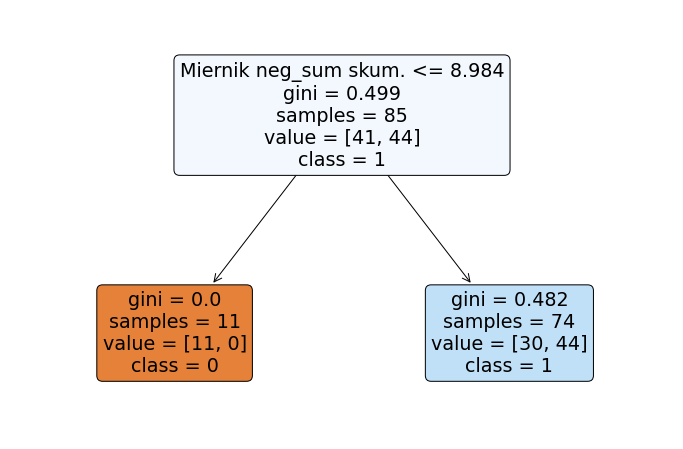

Accuracy: 0.6818181818181818
Balanced accuracy: 0.6818181818181818
Precision: 0.7291666666666667
Sensivity (recall): 0.6818181818181818
F1-Score: 0.6644880174291938


array([[ 5,  6],
       [ 1, 10]], dtype=int64)

In [608]:
X_train, X_test, y_train, y_test = train_test_split(df_mierniki_sum_klas[["Miernik neg_sum skum."]], df_mierniki_sum_klas["ZGON"], 
                                                    stratify=df_mierniki_sum_klas["ZGON"], test_size=odsetek, random_state=42)

# Utworzenie i dopasowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(random_state=42, max_depth=1)
clf.fit(X_train[["Miernik neg_sum skum."]], y_train.values.reshape(-1, 1))

# Przewidywanie na zbiorze testowym
y_pred = clf.predict(X_test[["Miernik neg_sum skum."]])

# Ocena dokładności
accuracy = accuracy_score(y_test, y_pred)

print(f'Dokładność klasyfikacji: {accuracy}')

from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=mierniki, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

accuracy_assessment(y_test, y_pred)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Dokładność klasyfikacji: 0.5454545454545454


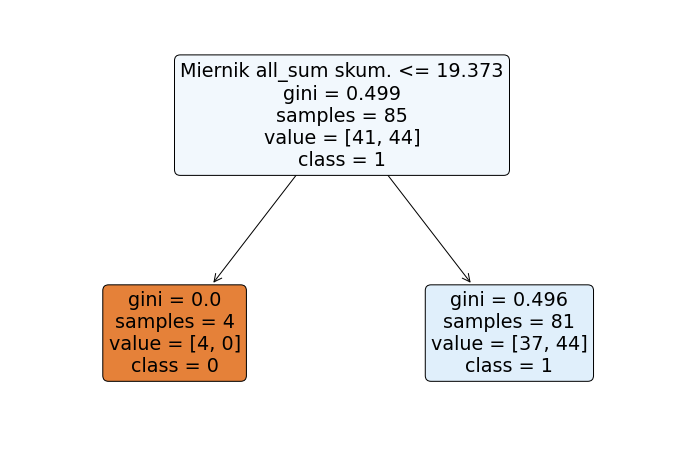

Accuracy: 0.5454545454545454
Balanced accuracy: 0.5454545454545454
Precision: 0.761904761904762
Sensivity (recall): 0.5454545454545454
F1-Score: 0.42708333333333337


array([[ 1, 10],
       [ 0, 11]], dtype=int64)

In [609]:
X_train, X_test, y_train, y_test = train_test_split(df_mierniki_sum_klas[["Miernik all_sum skum."]], df_mierniki_sum_klas["ZGON"], 
                                                    stratify=df_mierniki_sum_klas["ZGON"],  test_size=odsetek, random_state=42)

# Utworzenie i dopasowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(random_state=42, max_depth=1)
clf.fit(X_train[["Miernik all_sum skum."]], y_train.values.reshape(-1, 1))

# Przewidywanie na zbiorze testowym
y_pred = clf.predict(X_test[["Miernik all_sum skum."]])

# Ocena dokładności
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność klasyfikacji: {accuracy}')

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["Miernik all_sum skum."], class_names=['0', '1'], filled=True, rounded=True)
plt.show()
accuracy_assessment(y_test, y_pred)
confusion_matrix(y_test, y_pred)

In [610]:
X_train, X_test, y_train, y_test = train_test_split(df_miernik_last, df_miernik_last["ZGON"], 
                                                    stratify=df_miernik_last["ZGON"], test_size=odsetek, random_state=42)

X_data=X_train[col_neg].reset_index(drop=True)
y_data=y_train

pca_neg = PCA(n_components=1)
components = pca_neg.fit_transform(X_data)

kolumny_pca=col_neg

czynniki=pca_neg.components_
df_czynniki = pd.DataFrame(czynniki, columns=kolumny_pca)

def suma_iloczynow(wiersz):
    wagi = pca_neg.components_
    wartosci = wiersz[kolumny_pca].values
    return np.sum(wagi * wartosci)

df_miernik_df["Miernik neg PCA"]=df_miernik_df.apply(suma_iloczynow, axis=1)
df_miernik_df["Miernik neg PCA skum"]=df_miernik_df.groupby('PACJENT_NR')['Miernik neg PCA'].cumsum()
pca_neg.components_
pca_neg.explained_variance_ratio_

array([0.73044788])

In [611]:
X_train, X_test, y_train, y_test = train_test_split(df_miernik_last, df_miernik_last["ZGON"], 
                                                    stratify=df_miernik_last["ZGON"], test_size=odsetek, random_state=42)

X_data=X_train[col_all].reset_index(drop=True)
y_data=y_train

pca_all = PCA(n_components=1)
components = pca_all.fit_transform(X_data)

kolumny_pca=col_all

czynniki=pca_all.components_
df_czynniki = pd.DataFrame(czynniki, columns=kolumny_pca)

def suma_iloczynow(wiersz):
    wagi = pca_all.components_
    wartosci = wiersz[kolumny_pca].values
    return np.sum(wagi * wartosci)

df_miernik_df["Miernik all PCA"]=df_miernik_df.apply(suma_iloczynow, axis=1)
df_miernik_df["Miernik all PCA skum"]=df_miernik_df.groupby('PACJENT_NR')['Miernik all PCA'].cumsum()

pca_all.components_
pca_all.explained_variance_ratio_

array([0.67549653])

In [612]:
df_miernik_last = df_miernik_df.groupby('PACJENT_NR').last()
df_miernik_last["PACJENT_NR"]=df_miernik_last.index
df_miernik_last=df_miernik_last.reset_index(drop=True)
mierniki_pca=["Miernik neg PCA skum", "Miernik all PCA skum"]
df_mierniki_sum_klas=df_miernik_last[[*mierniki_pca, "ZGON"]]

Dokładność klasyfikacji: 0.5909090909090909


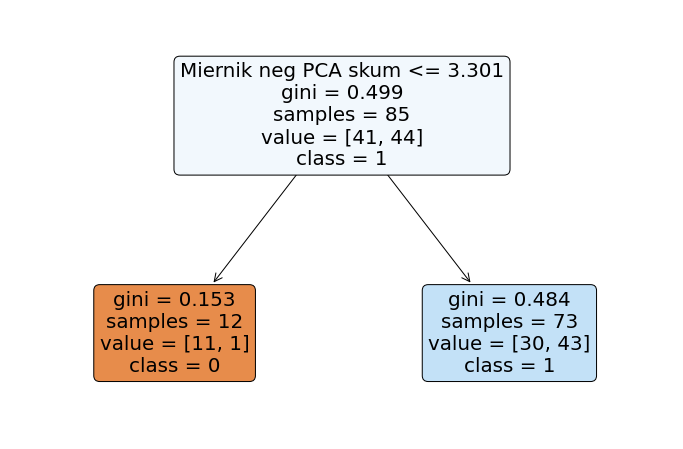

Accuracy: 0.5909090909090909
Balanced accuracy: 0.5909090909090908
Precision: 0.6527777777777778
Sensivity (recall): 0.5909090909090909
F1-Score: 0.5448275862068965


In [613]:
X_train, X_test, y_train, y_test = train_test_split(df_mierniki_sum_klas[mierniki_pca], df_mierniki_sum_klas["ZGON"], test_size=odsetek, 
                                                    stratify= df_mierniki_sum_klas["ZGON"], random_state=42)

# Utworzenie i dopasowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(random_state=42, max_depth=1)
clf.fit(X_train[["Miernik neg PCA skum"]], y_train.values.reshape(-1, 1))

# Przewidywanie na zbiorze testowym
y_pred = clf.predict(X_test[["Miernik neg PCA skum"]])

# Ocena dokładności
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność klasyfikacji: {accuracy}')

from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=mierniki_pca, class_names=['0', '1'], filled=True, rounded=True)
plt.show()
accuracy_assessment(y_test, y_pred)

Dokładność klasyfikacji: 0.5454545454545454


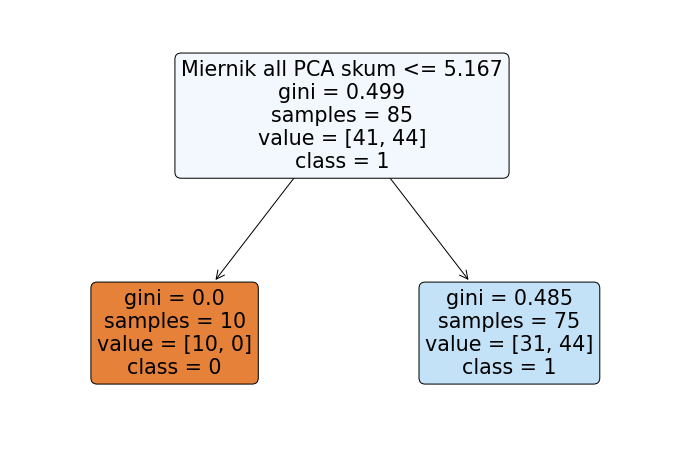

Accuracy: 0.5454545454545454
Balanced accuracy: 0.5454545454545454
Precision: 0.761904761904762
Sensivity (recall): 0.5454545454545454
F1-Score: 0.42708333333333337


In [614]:
X_train, X_test, y_train, y_test = train_test_split(df_mierniki_sum_klas[mierniki_pca], df_mierniki_sum_klas["ZGON"],  
                                                    stratify=df_mierniki_sum_klas["ZGON"], test_size=odsetek, random_state=42)

# Utworzenie i dopasowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(random_state=42, max_depth=1)
clf.fit(X_train[["Miernik all PCA skum"]], y_train.values.reshape(-1, 1))

# Przewidywanie na zbiorze testowym
y_pred = clf.predict(X_test[["Miernik all PCA skum"]])

# Ocena dokładności
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność klasyfikacji: {accuracy}')

from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["Miernik all PCA skum"], class_names=['0', '1'], filled=True, rounded=True)
plt.show()
accuracy_assessment(y_test, y_pred)


### PCA

In [615]:
X_train, X_test, y_train, y_test = train_test_split(df_miernik_last, df_miernik_last["ZGON"], 
                                                    stratify=df_miernik_last["ZGON"], test_size=odsetek, random_state=42)

X_data=X_train[cols2].reset_index(drop=True)
y_data=y_train

pca = PCA(n_components=2)
components = pca.fit_transform(X_data)

components_df = pd.DataFrame(components, columns=['Czynnik 1', 'Czynnik 2'])

train_data_reset_index = df_miernik_last.reset_index(drop=True)
components_df_reset_index = components_df.reset_index(drop=True)

merged_data = pd.concat([train_data_reset_index, components_df_reset_index], axis=1)
merged_data

pca.explained_variance_ratio_.sum()
pca.explained_variance_ratio_


array([0.56480056, 0.28938469])

In [616]:
merged_data['ZGON'] = merged_data['ZGON'].astype(str)

merged_data['Czy pacjent zmarł?'] = merged_data['ZGON'].map({'1.0': 'tak', '0.0': 'nie'})

fig = px.scatter(merged_data, x='Czynnik 1', y='Czynnik 2', color='Czy pacjent zmarł?', width=800, opacity=0.8) #text="PACJENT_NR")
fig.update_traces(textposition='top center', showlegend=True, marker_size=14) 

fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20)
    )
)
fig.update_layout(legend = dict(font = dict( size = 18)),
                  legend_title = dict(font = dict(size = 18)))
fig.update_layout(template="plotly_white")
fig.show()
fig.write_image("../images/"+"pca_miernik"+ ".png", width=1000, height=600, scale=4, format="png")


In [617]:
df_miernik_df

,BETET,CO2TET,O2TET,IONH,BETET_neg,O2TET_neg,IONH_neg,CO2TET_neg,BETET_all,O2TET_all,...,BADANIE_NR,ZGON,Miernik neg_sum,Miernik neg_sum skum.,Miernik all_sum,Miernik all_sum skum.,Miernik neg PCA,Miernik neg PCA skum,Miernik all PCA,Miernik all PCA skum
0,0.326087,2.21,-0.720,1.882698,0.000000,0.72,0.882698,1.21,0.000000,0.72,...,1.0,0.0,2.812698,2.812698,2.812698,2.812698,1.499224,1.499224,1.434073,1.434073
1,0.086957,5.22,4.880,1.425028,0.000000,0.00,0.425028,4.22,0.000000,3.88,...,2.0,0.0,4.645028,7.457726,8.525028,11.337726,3.530031,5.029255,3.285687,4.719759
2,0.760870,3.10,6.000,2.201643,0.000000,0.00,1.201643,2.10,0.000000,5.00,...,3.0,0.0,3.301643,10.759368,8.301643,19.639368,2.374998,7.404253,2.036292,6.756052
3,0.869565,2.75,1.440,1.882698,0.000000,0.00,0.882698,1.75,0.000000,0.44,...,4.0,0.0,2.632698,13.392066,3.072698,22.712066,1.905054,9.309307,1.873061,8.629113
4,0.608696,2.61,2.800,1.970160,0.000000,0.00,0.970160,1.61,0.000000,1.80,...,5.0,0.0,2.580160,15.972226,4.380160,27.092226,1.851371,11.160678,1.726842,10.355955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,-0.717391,1.63,0.420,2.294287,0.717391,0.00,1.294287,0.63,0.717391,0.00,...,5.0,1.0,2.641678,9.889567,2.641678,10.929567,1.371775,4.868860,1.370517,4.797609
2930,-0.891304,1.39,1.640,2.254399,0.891304,0.00,1.254399,0.39,0.891304,0.64,...,6.0,1.0,2.535704,12.425270,3.175704,14.105270,1.179653,6.048513,1.137867,5.935476
2931,-1.065217,1.71,0.316,2.708690,1.065217,0.00,1.708690,0.71,1.065217,0.00,...,7.0,1.0,3.483908,15.909178,3.483908,17.589178,1.729365,7.777878,1.729059,7.664536
2932,-0.695652,1.15,1.600,1.857967,0.695652,0.00,0.857967,0.15,0.695652,0.60,...,8.0,1.0,1.703619,17.612797,2.303619,19.892797,0.725654,8.503533,0.687096,8.351632


In [618]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_miernik_df[df_miernik_df['ZGON'] == 0]
df_zgon_1 = df_miernik_df[df_miernik_df['ZGON'] == 1]

# fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Zgon: nie', 'Zgon: tak'])
# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y='Miernik neg_sum skum.', color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', 'Miernik neg_sum skum.': 'Miernik', 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig1.update_xaxes(title_text='Numer badania')
fig1.update_yaxes(title_text='Miernik sumy negatywnych wyników')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y='Miernik neg_sum skum.', color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', 'Miernik neg_sum skum.': 'Miernik', 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig2.update_xaxes(title_text='Numer badania')
fig2.update_yaxes(title_text='Miernik sumy negatywnych wyników')
fig2.update_layout(showlegend=False)

fig1.update_yaxes(range=[0, 180])
fig2.update_yaxes(range=[0, 180])

fig1.update_xaxes(range=[0, 65])
fig2.update_xaxes(range=[0, 65])

fig1.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20)
    )
)
fig2.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=24),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=24)
    )
)
fig1.update_layout(template="plotly_white")
fig2.update_layout(template="plotly_white")
# Wyświetl oba wykresy
fig1.show()
fig2.show()
fig1.write_image("../images/"+"miernik_pacjenci_wyleczeni"+ ".png", width=1000, height=800, scale=4, format="png")
fig2.write_image("../images/"+"miernik_pacjenci_zmarli"+ ".png", width=1000, height=800, scale=4, format="png")
# fig.write_html("miernik_pacjenci_wyleczeni.html")
# fig2.write_html("miernik_pacjenci_zmarli.html")
# fig0.write_html("ph_skumulowane.html")


### PCA2 

In [619]:
from sklearn.ensemble import RandomForestClassifier
train_data, test_data = train_test_split(df_miernik_last, test_size=0.2, stratify=df_miernik_last["ZGON"], random_state=42)

X_train=train_data[col_neg].reset_index(drop=True)
y_train=train_data["ZGON"].reset_index(drop=True)

X_test=test_data[col_neg].reset_index(drop=True)
y_test=test_data["ZGON"].reset_index(drop=True)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_pca, y_train)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
y_pred=lda.predict(X_test_pca)

# w = lda.coef_[0]
# b = lda.intercept_

# print(w)

# Przewidywanie na danych testowych po redukcji wymiarowości
# y_pred = model.predict(X_test_pca)

accuracy_assessment(y_pred, y_test)
pca.explained_variance_ratio_
# confusion_matrix(y_pred, y_test)
pca.components_

Accuracy: 0.8636363636363636
Balanced accuracy: 0.8928571428571428
Precision: 0.9008264462809918
Sensivity (recall): 0.8636363636363636
F1-Score: 0.8662200956937799


array([[ 0.10609772,  0.01654745,  0.77360133,  0.62450815],
       [ 0.51439963, -0.0598182 , -0.57822057,  0.6304568 ],
       [ 0.13711839,  0.98994907, -0.01464623, -0.03138269]])

In [620]:
col_neg

['BETET_neg', 'O2TET_neg', 'CO2TET_neg', 'IONH_neg']

In [621]:
components_df2 = pd.DataFrame(X_train_pca, columns=['Czynnik 1', 'Czynnik 2', 'Czynnik 3'])

train_data_reset_index = train_data.reset_index(drop=True)
components_df_reset_index = components_df2.reset_index(drop=True)

merged_data = pd.concat([train_data_reset_index, components_df_reset_index], axis=1)
# merged_data

In [622]:

merged_data['ZGON'] = merged_data['ZGON'].astype(str)
merged_data['Czy pacjent zmarł?'] = merged_data['ZGON'].map({'1.0': 'tak', '0.0': 'nie'})

fig = px.scatter_3d(merged_data, x='Czynnik 1', y='Czynnik 2', z='Czynnik 3', color='Czy pacjent zmarł?', size_max=18, opacity=0.8)
fig.update_traces(textposition='top center', marker_size=6)

fig.update_layout(
    scene=dict(
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14)),
        zaxis=dict(tickfont=dict(size=14)),
    )
)

fig.update_layout(legend=dict(font=dict(size=14)), legend_title=dict(font=dict(size=14)))
fig.update_layout(template="plotly_white")
fig.show()

fig.write_image("../images/" + "pca_miernik_3d" + ".png", width=1000, height=600, scale=4, format="png")
fig.write_html("pca_miernik_3d.html")

### LDA

In [623]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
y_pred=lda.predict(X_test_pca)

w = lda.coef_[0]
b = lda.intercept_

print(w)
accuracy_assessment(y_pred, y_test)

# comps=pd.DataFrame(components, columns=["Czynnik 1", "Czynnik 2"])
# comps["PACJENT_NR"]=train_data.index
# comps
# color_map = {1.0: 'red', 0.0: 'blue'}
# fig = px.scatter(comps, x='Czynnik 1', y='Czynnik 2', color=y_data, color_discrete_map=color_map, width=800)
# # # # # fig.write_image("images/pca.png")
# fig.show()


[0.54672764 0.25295341 0.20495296]
Accuracy: 0.8636363636363636
Balanced accuracy: 0.8928571428571428
Precision: 0.9008264462809918
Sensivity (recall): 0.8636363636363636
F1-Score: 0.8662200956937799


In [624]:
def suma_iloczynow_wiersza(wiersz):
    return np.sum(wiersz)#* wagi)

df_miernik['Miernik'] = df_miernik.apply(suma_iloczynow_wiersza, axis=1)

In [625]:
df_miernik_all=pd.DataFrame()
df_miernik_all[["PACJENT_NR", "BADANIE_NR", "ZGON"]]=df_prep[["PACJENT_NR", "BADANIE_NR", "ZGON"]]
df_miernik_all["Miernik"]=df_miernik["Miernik"]

In [626]:
df_miernik_all

,PACJENT_NR,BADANIE_NR,ZGON,Miernik
0,1.0,1.0,0.0,9.324180
1,1.0,2.0,0.0,24.782040
2,1.0,3.0,0.0,23.665798
3,1.0,4.0,0.0,12.647659
4,1.0,5.0,0.0,14.949175
...,...,...,...,...
2929,145.0,5.0,1.0,8.910252
2930,145.0,6.0,1.0,10.104502
2931,145.0,7.0,1.0,10.637288
2932,145.0,8.0,1.0,7.919552


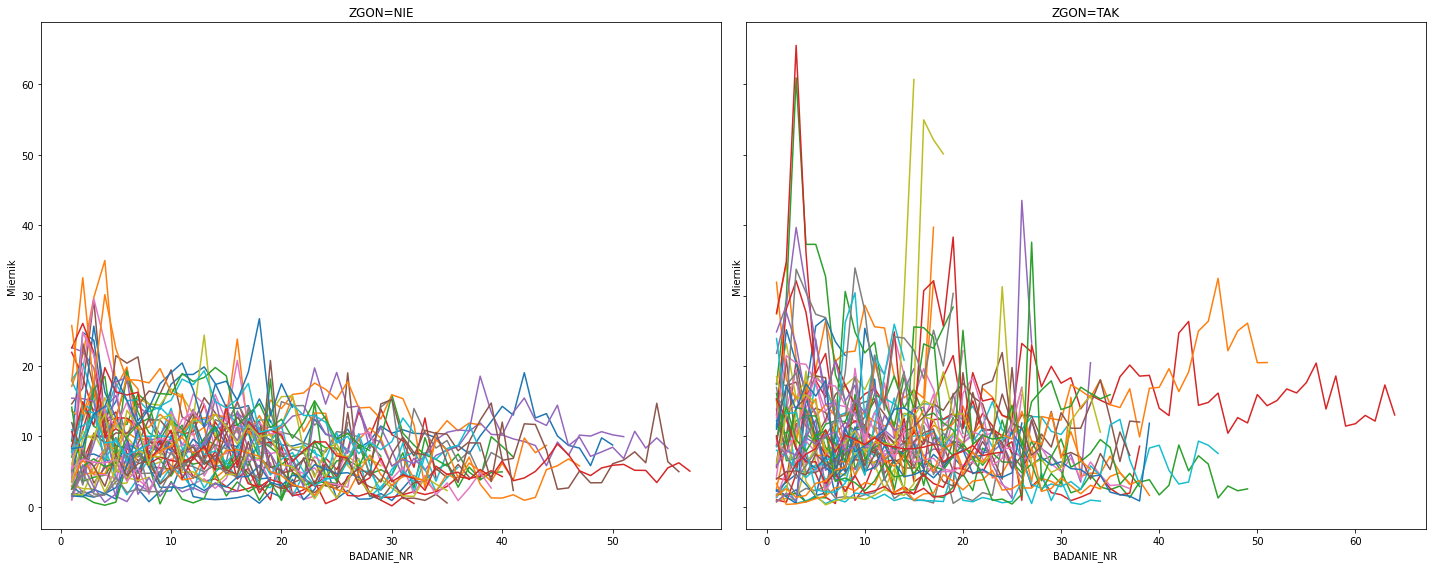

In [627]:
df_zgon_0 = df_miernik_all[df_miernik_all['ZGON'] == 0]
df_zgon_1 = df_miernik_all[df_miernik_all['ZGON'] == 1]

# Stwórz dwa wykresy
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Wykres dla ZGON=0
for pacjent_nr, group in df_zgon_0.groupby('PACJENT_NR'):
    # if all(group['Miernik'].values <= 8):
        axes[0].plot(group['BADANIE_NR'].values, group['Miernik'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[0].set_title('ZGON=NIE')
axes[0].set_xlabel('BADANIE_NR')
axes[0].set_ylabel('Miernik')

# Wykres dla ZGON=1
for pacjent_nr, group in df_zgon_1.groupby('PACJENT_NR'):
    # if all(group['Miernik'].values <= 8):
        axes[1].plot(group['BADANIE_NR'].values, group['Miernik'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[1].set_title('ZGON=TAK')
axes[1].set_xlabel('BADANIE_NR')
axes[1].set_ylabel('Miernik')

plt.tight_layout()
plt.show()

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\3634101567.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1006: FutureWarning:

When grouping 

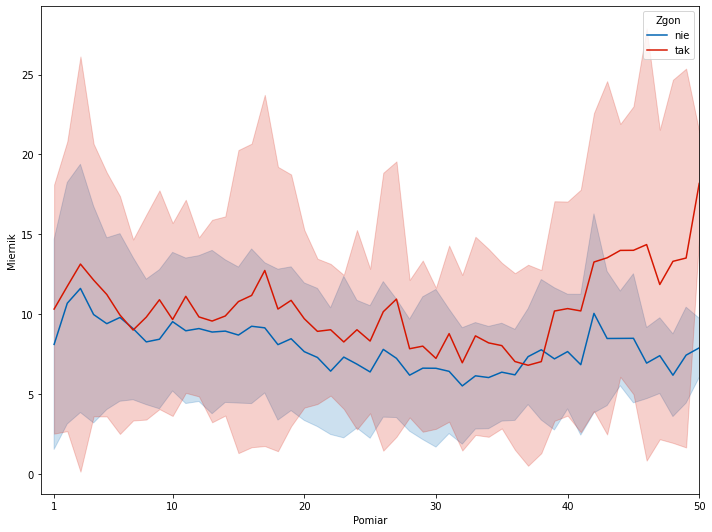

In [628]:
df_line = df_miernik_all.copy()
df_line["ZGON"].replace({0: "nie", 1: "tak"}, inplace=True)

plt.figure(figsize=(10, 7.5), facecolor='white')

sns.lineplot(data=df_line, x="BADANIE_NR", y="Miernik", hue="ZGON", ci='sd',
                palette={'nie': my_blue, 'tak': my_red})

plt.xlabel('Pomiar')
plt.xlim(0, 50)
plt.xticks(ticks=[1, 10, 20, 30, 40, 50])
plt.legend(title="Zgon")
plt.tight_layout()

# Pokazywanie obrazu
plt.show()

In [629]:
df_miernik_all_scum=df_miernik_all.copy()
df_miernik_all_scum["Miernik_sum"]=df_miernik_all.groupby('PACJENT_NR')['Miernik'].cumsum()
df_miernik_all_scum

,PACJENT_NR,BADANIE_NR,ZGON,Miernik,Miernik_sum
0,1.0,1.0,0.0,9.324180,9.324180
1,1.0,2.0,0.0,24.782040,34.106220
2,1.0,3.0,0.0,23.665798,57.772018
3,1.0,4.0,0.0,12.647659,70.419676
4,1.0,5.0,0.0,14.949175,85.368851
...,...,...,...,...,...
2929,145.0,5.0,1.0,8.910252,39.890265
2930,145.0,6.0,1.0,10.104502,49.994768
2931,145.0,7.0,1.0,10.637288,60.632056
2932,145.0,8.0,1.0,7.919552,68.551608


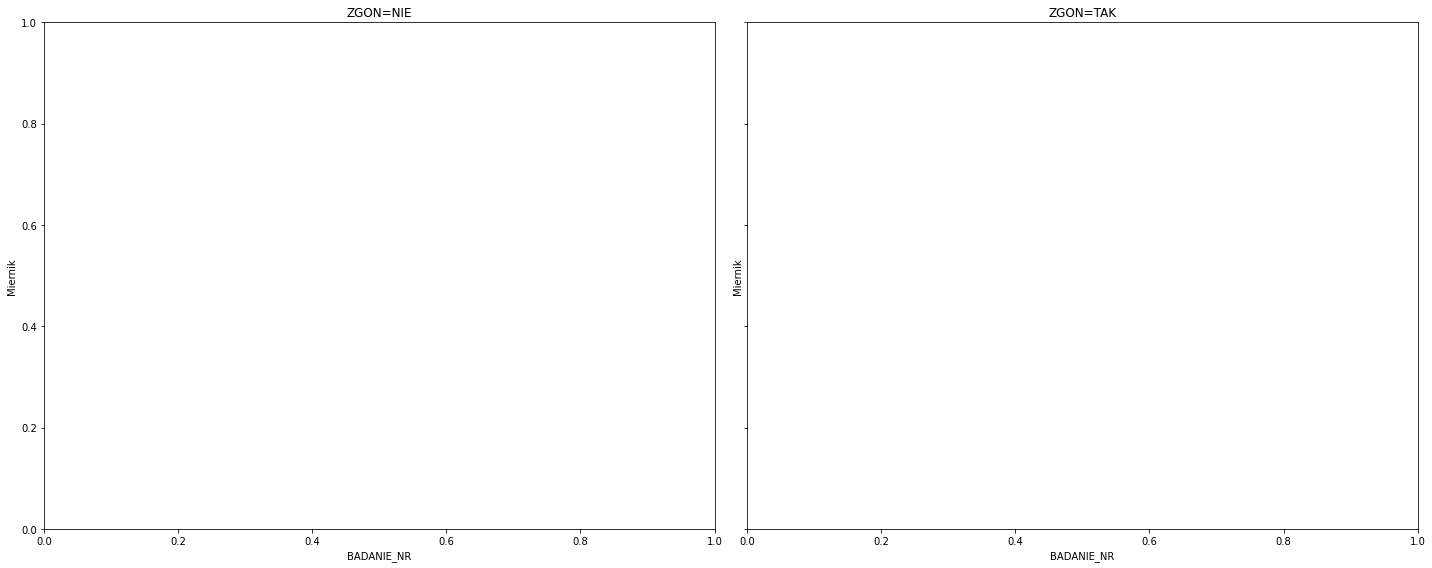

In [630]:
df_zgon_0 = df_miernik_all_scum[df_miernik_all['ZGON'] == 0]
df_zgon_1 = df_miernik_all_scum[df_miernik_all['ZGON'] == 1]

# Stwórz dwa wykresy
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Wykres dla ZGON=0
for pacjent_nr, group in df_zgon_0.groupby('PACJENT_NR'):
     if all(group['Miernik_sum'].values <= 10):
        axes[0].plot(group['BADANIE_NR'].values, group['Miernik_sum'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[0].set_title('ZGON=NIE')
axes[0].set_xlabel('BADANIE_NR')
axes[0].set_ylabel('Miernik')

# Wykres dla ZGON=1
for pacjent_nr, group in df_zgon_1.groupby('PACJENT_NR'):
    if all(group['Miernik_sum'].values <= 10):
        axes[1].plot(group['BADANIE_NR'].values, group['Miernik_sum'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[1].set_title('ZGON=TAK')
axes[1].set_xlabel('BADANIE_NR')
axes[1].set_ylabel('Miernik')

plt.tight_layout()
plt.show()

In [631]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_miernik_all_scum[df_miernik_all['ZGON'] == 0]
df_zgon_1 = df_miernik_all_scum[df_miernik_all['ZGON'] == 1]

fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Scatter Plot', 'Box Plot'])

# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y='Miernik_sum', color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', 'Miernik_sum': 'Miernik', 'PACJENT_NR': 'Pacjent'},
              title='ZGON=NIE', width=800, height=800)
fig1.update_xaxes(title_text='BADANIE_NR')
fig1.update_yaxes(title_text='Skumulowany miernik negatywnych wynikóW BE, pCO2 i IONH')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y='Miernik_sum', color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', 'Miernik_sum': 'Miernik', 'PACJENT_NR': 'Pacjent'},
               title='ZGON=TAK', width=800, height=800)
fig2.update_xaxes(title_text='BADANIE_NR')
fig2.update_yaxes(title_text='Skumulowany miernik negatywnych wynikóW BE, pCO2 i IONH')
fig2.update_layout(showlegend=False)

fig1.update_yaxes(range=[0, 100])
fig2.update_yaxes(range=[0, 100])
# Wyświetl oba wykresy
fig1.show()
fig2.show()
# fig.write_html("miernik_pacjenci_wyleczeni.html")
# fig2.write_html("miernik_pacjenci_zmarli.html")
# fig0.write_html("ph_skumulowane.html")


In [653]:
df_miernik_df

,BETET,CO2TET,O2TET,IONH,BETET_neg,O2TET_neg,IONH_neg,CO2TET_neg,BETET_all,O2TET_all,...,BADANIE_NR,ZGON,Miernik neg_sum,Miernik neg_sum skum.,Miernik all_sum,Miernik all_sum skum.,Miernik neg PCA,Miernik neg PCA skum,Miernik all PCA,Miernik all PCA skum
0,0.326087,2.21,-0.720,1.882698,0.000000,0.72,0.882698,1.21,0.000000,0.72,...,1.0,0.0,2.812698,2.812698,2.812698,2.812698,1.499224,1.499224,1.434073,1.434073
1,0.086957,5.22,4.880,1.425028,0.000000,0.00,0.425028,4.22,0.000000,3.88,...,2.0,0.0,4.645028,7.457726,8.525028,11.337726,3.530031,5.029255,3.285687,4.719759
2,0.760870,3.10,6.000,2.201643,0.000000,0.00,1.201643,2.10,0.000000,5.00,...,3.0,0.0,3.301643,10.759368,8.301643,19.639368,2.374998,7.404253,2.036292,6.756052
3,0.869565,2.75,1.440,1.882698,0.000000,0.00,0.882698,1.75,0.000000,0.44,...,4.0,0.0,2.632698,13.392066,3.072698,22.712066,1.905054,9.309307,1.873061,8.629113
4,0.608696,2.61,2.800,1.970160,0.000000,0.00,0.970160,1.61,0.000000,1.80,...,5.0,0.0,2.580160,15.972226,4.380160,27.092226,1.851371,11.160678,1.726842,10.355955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,-0.717391,1.63,0.420,2.294287,0.717391,0.00,1.294287,0.63,0.717391,0.00,...,5.0,1.0,2.641678,9.889567,2.641678,10.929567,1.371775,4.868860,1.370517,4.797609
2930,-0.891304,1.39,1.640,2.254399,0.891304,0.00,1.254399,0.39,0.891304,0.64,...,6.0,1.0,2.535704,12.425270,3.175704,14.105270,1.179653,6.048513,1.137867,5.935476
2931,-1.065217,1.71,0.316,2.708690,1.065217,0.00,1.708690,0.71,1.065217,0.00,...,7.0,1.0,3.483908,15.909178,3.483908,17.589178,1.729365,7.777878,1.729059,7.664536
2932,-0.695652,1.15,1.600,1.857967,0.695652,0.00,0.857967,0.15,0.695652,0.60,...,8.0,1.0,1.703619,17.612797,2.303619,19.892797,0.725654,8.503533,0.687096,8.351632


In [648]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [675]:
results_df = pd.DataFrame(columns=['Badanie_NR',  'LDA', 'RandomForest','KNeighbors', 'SVC'])
merged_data=df_miernik_df[[*col_neg, "ZGON", "PACJENT_NR", "BADANIE_NR"]]


for i in range(2, 41):
    filtered_data = merged_data[merged_data['BADANIE_NR'] < i]
    X_data=filtered_data.groupby("PACJENT_NR").sum()[col_neg]
    y_data=filtered_data.groupby("PACJENT_NR")["ZGON"].first()

    # Przygotowanie danych do klasyfikacji
    X = X_data
    y = y_data

   # Klasyfikatory
    classifiers = {
        'LDA': LinearDiscriminantAnalysis(),
         'RandomForest': RandomForestClassifier(),
        'KNeighbors': KNeighborsClassifier(),
        'SVC': SVC()
    }

    # Pętla dla każdego klasyfikatora
    results = {'Badanie_NR': i}
    for clf_name, clf in classifiers.items():
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
        mean_accuracy = scores.mean()
        results[clf_name] = mean_accuracy

    # Dodanie wyników do tymczasowej ramki danych
    temp_df = pd.DataFrame([results])

    # Konkatenacja wyników z ramką główną
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\1819610018.py:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Badanie_NR,LDA,RandomForest,KNeighbors,SVC
0,2,0.542857,0.606926,0.681385,0.606926
1,3,0.541991,0.644589,0.625541,0.671429
2,4,0.569697,0.644156,0.569697,0.643723
3,5,0.607792,0.596970,0.615152,0.634632
4,6,0.570996,0.587446,0.578788,0.615584
5,7,0.589177,0.635065,0.579221,0.570996
6,8,0.625541,0.588745,0.587879,0.580087
7,9,0.671861,0.587879,0.541126,0.588312
8,10,0.652814,0.606061,0.578788,0.579221
9,11,0.635931,0.633333,0.505195,0.579221


In [680]:
from sklearn.preprocessing import StandardScaler

In [690]:

results_df = pd.DataFrame(columns=['Badanie_NR',  'LDA', 'DecisionTree', 'RandomForest', 'KNeighbors', 'SVC'])
merged_data = df_miernik_df[[*col_neg, "ZGON", "PACJENT_NR", "BADANIE_NR"]]

for i in range(2, 31):
    filtered_data = merged_data[merged_data['BADANIE_NR'] < i]
    
    # Grupowanie i sumowanie danych
    X_data = filtered_data.groupby("PACJENT_NR").sum()[col_neg]
    y_data = filtered_data.groupby("PACJENT_NR")["ZGON"].first()

        # Standaryzacja danych
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_data)

    # PCA
    pca = PCA(n_components=3)  # Ustaw liczbę komponentów zgodnie z wymaganiami
    X_pca = pca.fit_transform(X_scaled)

    # Przygotowanie danych do klasyfikacji
    X = X_pca
    y = y_data

    # Klasyfikatory
    classifiers = {
        'LDA': LinearDiscriminantAnalysis(),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'KNeighbors': KNeighborsClassifier(),
        'SVC': SVC()
    }

    # Pętla dla każdego klasyfikatora
    results = {'Badanie_NR': i-1}
    for clf_name, clf in classifiers.items():
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
        mean_accuracy = scores.mean()
        results[clf_name] = mean_accuracy

    # Dodanie wyników do tymczasowej ramki danych
    temp_df = pd.DataFrame([results])

    # Konkatenacja wyników z ramką główną
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df

C:\Users\dorot\AppData\Local\Temp\ipykernel_62548\532676112.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Badanie_NR,LDA,DecisionTree,RandomForest,KNeighbors,SVC
0,1,0.624675,0.568831,0.652381,0.653247,0.680952
1,2,0.596537,0.641991,0.644156,0.596970,0.643723
2,3,0.615152,0.644589,0.634199,0.615152,0.606494
3,4,0.643723,0.522078,0.625974,0.559307,0.596537
4,5,0.653247,0.504762,0.549784,0.652814,0.670996
5,6,0.643290,0.578788,0.625541,0.577922,0.634632
6,7,0.670996,0.513420,0.540693,0.633333,0.634632
7,8,0.680952,0.589177,0.579654,0.615584,0.643290
8,9,0.671429,0.475325,0.570130,0.588312,0.633766
9,10,0.671861,0.635065,0.634632,0.597403,0.625541


In [694]:
melted_results_df = pd.melt(results_df, id_vars=['Badanie_NR'], value_vars=['LDA', 'RandomForest', 'KNeighbors', 'SVC'],
                            var_name='Klasyfikator', value_name='Dokładność')
x_label='Numer badania'
title='klasyfikacja_obserwacje_accuracy'
# Tworzymy wykres
fig = px.line(melted_results_df, x='Badanie_NR', y='Dokładność', color='Klasyfikator', markers=True, line_shape='linear')

# Dodajemy etykiety i tytuł
fig.update_layout(
    xaxis=dict(
        title=x_label,
        tickfont=dict(size=16),
        title_font=dict(size=20),
    ),
    yaxis=dict(
        title='Dokładność',
        tickfont=dict(size=16),
        title_font=dict(size=20)
    )
)

fig.update_layout(template="plotly_white")
fig.show()
fig.write_image("../images/"+title+".png", width=1000, height=600, scale=4, format="png")
